# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [6]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDER                     83
ENROLL_4                          83
ENROLL_8                          83
ENROLL_12                         83
ENROLL_PRIMARY                   695
ENROLL_HS                        644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Average Math 8 Score

How many years of data are logged in our dataset? 

In [16]:
df["YEAR"]
#check if we are missing any years /states 
print(2019-1992+1)

28


In [17]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [35]:
m = df[df["STATE"] == "MICHIGAN"]
o = df[df["STATE"] == "OHIO"]
mean_m = m["AVG_MATH_8_SCORE"].mean()
mean_o = o["AVG_MATH_8_SCORE"].mean()
print(mean_m, mean_o)
print("ohio has a higher average 8th graade math score")

276.1666666666667 282.25
ohio has a higher average 8th graade math score


Find the average for your outcome score across all states in 2019

In [42]:
df_ = df[df["YEAR"] == 2019]
df_mean = df_["AVG_MATH_8_SCORE"].mean()
df_.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1662,2019_ALABAMA,ALABAMA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,230.0,269.0,212.0,253.0
1663,2019_ALASKA,ALASKA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,232.0,274.0,204.0,252.0
1664,2019_ARIZONA,ARIZONA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,238.0,280.0,216.0,259.0
1665,2019_ARKANSAS,ARKANSAS,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,233.0,274.0,215.0,259.0
1666,2019_CALIFORNIA,CALIFORNIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,235.0,276.0,216.0,259.0


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [43]:
df.groupby(["STATE"])["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [47]:
df["STATE_REVENUE_OVER_FEDERAL_REVENUE"] = df["STATE_REVENUE"] / df["FEDERAL_REVENUE"]
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,STATE_REVENUE_OVER_TOTAL_REVENUE,STATE_REVENUE_OVER_FEDERAL_REVENUE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,0.619298,5.454153
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,0.686659,6.749494
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,0.420436,4.598423
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,0.560051,5.369209
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,0.630103,7.983958


Feature engineering justification: I want to consider state revenue as an input variable, but in order to account for changing federal and state revenue, I decided to create a feature to express state revenue as a fraction of the federal revenue. Note: In some cases, federal revenue is smaller than state revenue. This is most likely because they use different units. However, this will just be a base 10 issue, so it should not affect the correlation of the data.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

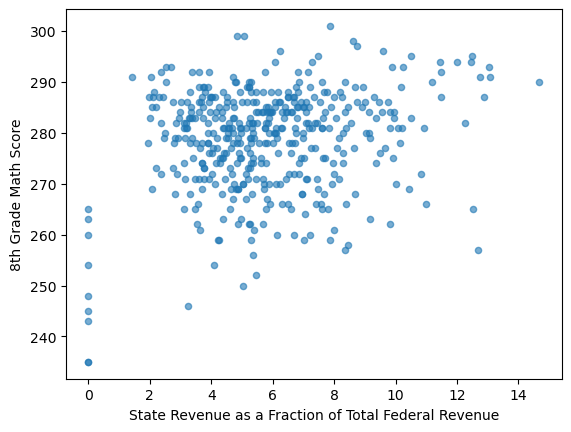

In [48]:
df.plot.scatter(x='STATE_REVENUE_OVER_FEDERAL_REVENUE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('State Revenue as a Fraction of Total Federal Revenue')
plt.ylabel('8th Grade Math Score')

**State Revenue as a fraction of total federal revenue has little affect on 8th Grade Math Scores**

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

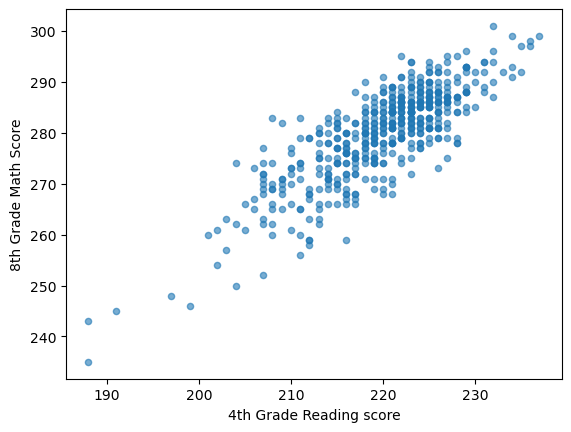

In [49]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('4th Grade Reading score')
plt.ylabel('8th Grade Math Score')

**4th Grade Reading Scores are correlated with 8th Grade Math Scores**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [54]:
from sklearn.model_selection import train_test_split

In [86]:
X = df[['AVG_READING_4_SCORE','STATE_REVENUE_OVER_FEDERAL_REVENUE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y = y.fillna(y.median())


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [88]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [89]:
# create your model here
model = LinearRegression()

In [90]:
model.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [99]:
model.score(X_test, y_test)

0.34297207453246403

In [100]:
np.mean(model.predict(X_test)-y_test)

0.2668418690614642

In [101]:
np.mean(np.abs(model.predict(X_test)-y_test))

5.454267375246776

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

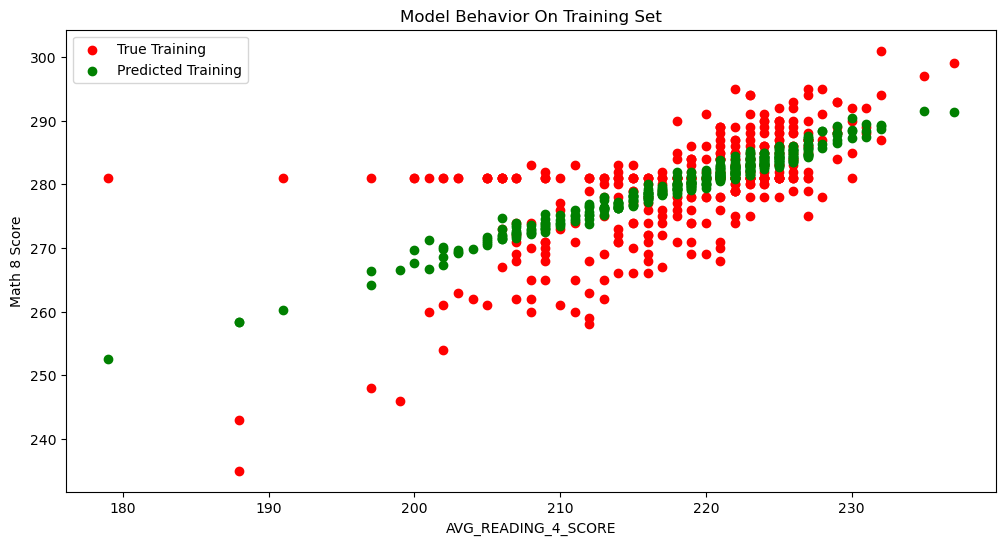

In [97]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

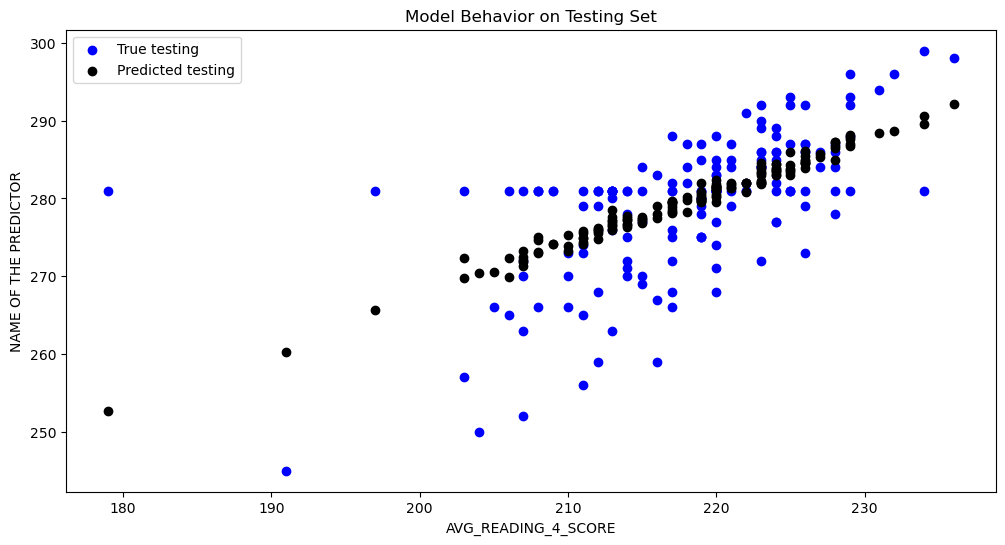

In [98]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

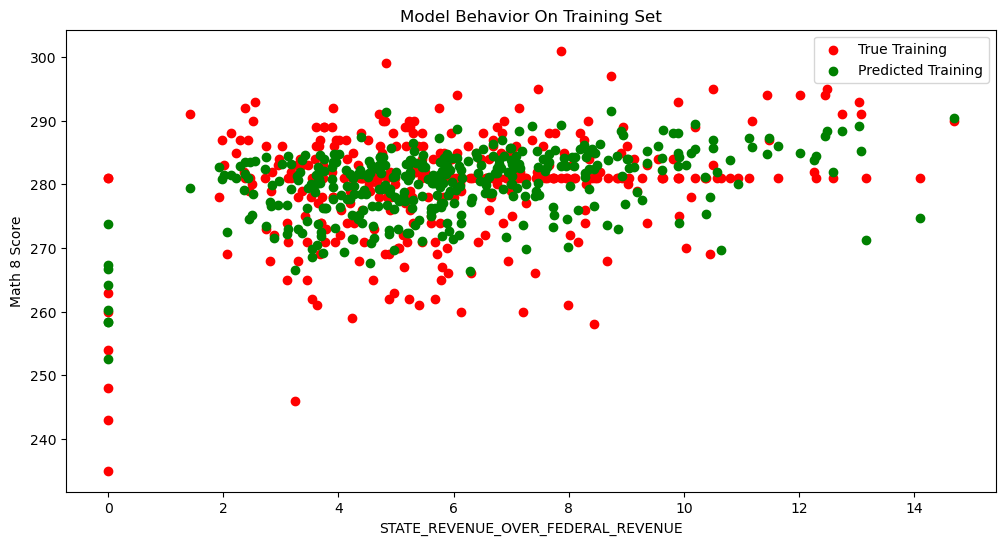

In [102]:
col_name = 'STATE_REVENUE_OVER_FEDERAL_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

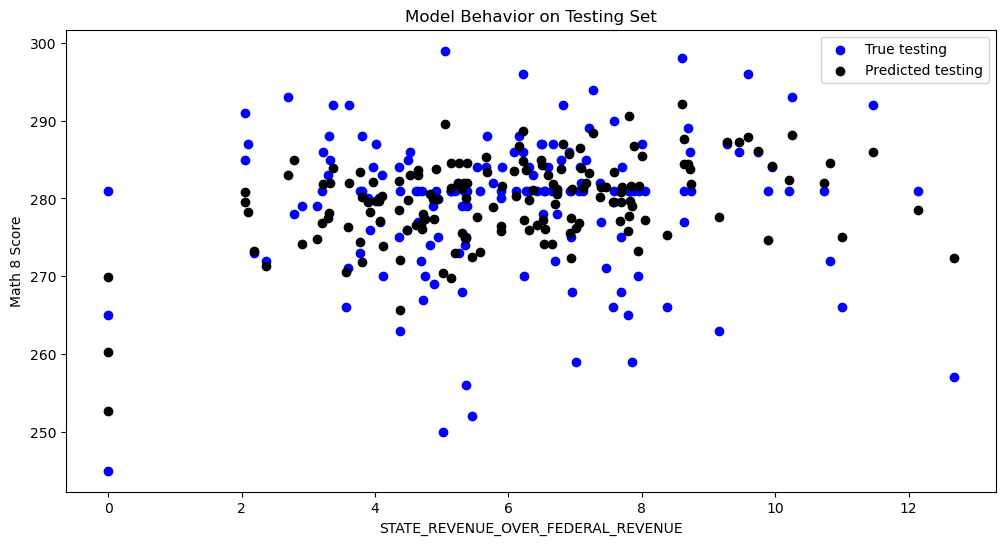

In [103]:
col_name = 'STATE_REVENUE_OVER_FEDERAL_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**
**I analyzed how a reading score in 4th grade and a states revenue as a fraction of its total revenue may affect a student's math score later in 8th grade. There seems to be a weak correlation between the data, with an r^2 value of 0.343. However, looking at the preformance of the model from the graphs, we can see that while the model does not do a good job at predicting the 8th grade math score from the 4th grade math score, it does seem to preform well at predicting the 8th grade math score as a function of state revenue over total revenue.**